In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/filtered/Filtered_Crop_Data.csv


In [1]:
# train_model.py
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load dataset
df = pd.read_csv("Enhanced_Crop_Data.csv")

X = df[['temperature', 'humidity', 'soil_moisture']]
y = df['label']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Save model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as model.pkl ✅")


Model saved as model.pkl ✅


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0443 - loss: 3.1283 - val_accuracy: 0.0545 - val_loss: 3.0926
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0498 - loss: 3.0843 - val_accuracy: 0.0705 - val_loss: 3.0625
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0646 - loss: 3.0450 - val_accuracy: 0.1341 - val_loss: 2.9965
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0879 - loss: 2.9779 - val_accuracy: 0.1205 - val_loss: 2.8818
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0962 - loss: 2.8494 - val_accuracy: 0.1523 - val_loss: 2.7233
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1434 - loss: 2.6872 - val_accuracy: 0.1614 - val_loss: 2.5578
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1754 - loss: 2.5375 - val_accuracy: 0.2045 - val_loss: 2.4189
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2271 - loss: 2.3975 - val_accuracy: 0.2364 - val_

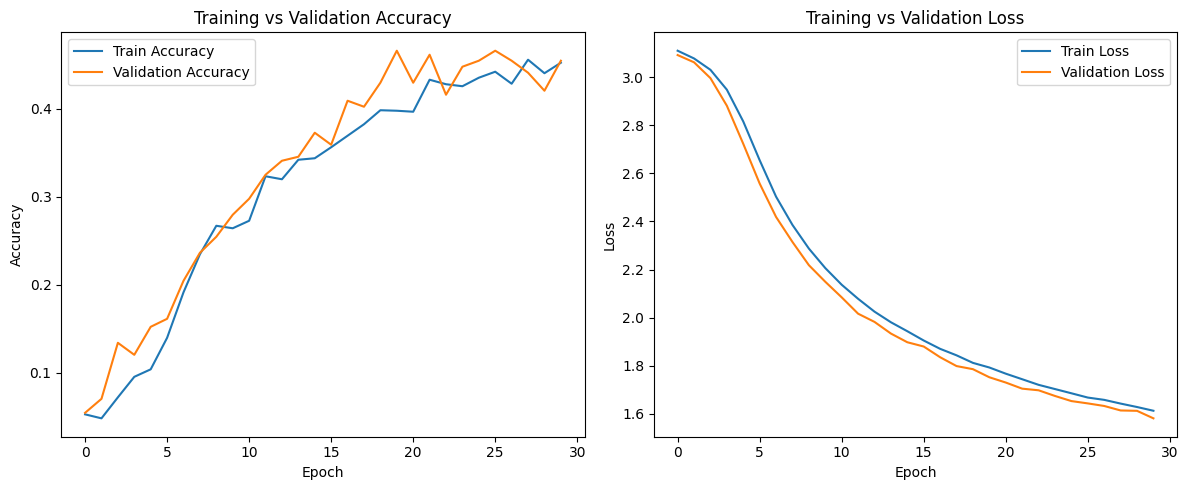

Test Accuracy: 85.00%
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


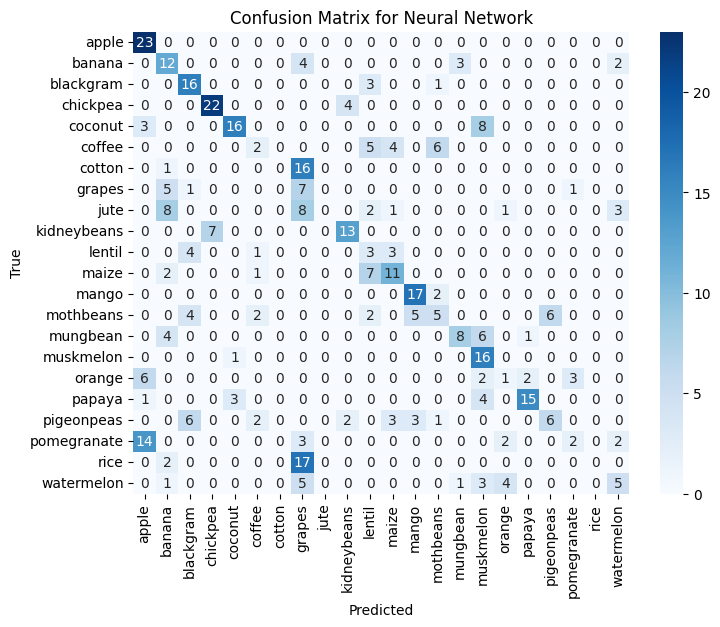

Saved artifact at '/tmp/tmpbd_7ixef'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='keras_tensor_16')
Output Type:
  TensorSpec(shape=(None, 22), dtype=tf.float32, name=None)
Captures:
  133717518973264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133717513075792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133717513067344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133717513068496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133717513067152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133717513062544: TensorSpec(shape=(), dtype=tf.resource, name=None)
TinyML model saved as crop_recommendation_model.tflite
Recommended Crop: lentil


W0000 00:00:1744450611.665725      31 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744450611.665765      31 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/filtered/Filtered_Crop_Data.csv', header=1)

X = df[['temperature', 'humidity', 'soil_moisture']].values
y = df['label'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

y_pred_probs = model.predict(X_test)
y_pred_nn_classes = np.argmax(y_pred_probs, axis=1)
cm_nn = confusion_matrix(y_test, y_pred_nn_classes)

accuracy_nn = accuracy_score(y_test.argmax(axis=1), y_pred_nn_classes)
print(f'Test Accuracy: {accuracy_nn * 100:.2f}%')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network')
plt.show()

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("crop_recommendation_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TinyML model saved as crop_recommendation_model.tflite")

import tensorflow.lite as tflite

interpreter = tflite.Interpreter(model_path="crop_recommendation_model.tflite")
interpreter.allocate_tensors()

with open("label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_data = np.array([[25.0, 70.0, 30.0]], dtype=np.float32)
input_data = scaler.transform(input_data)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

output = interpreter.get_tensor(output_details[0]['index'])
predicted_index = np.argmax(output)
predicted_label = encoder.inverse_transform([predicted_index])[0]

print("Recommended Crop:", predicted_label)
